<a href="https://colab.research.google.com/github/Anindita-172/Mental-Fitness-Tracker/blob/main/Mental_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np

In [ ]:
data =pd.read_csv("survey.csv")

Gathering information about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
data.shape

(1259, 27)

In [ ]:
data.describe


<bound method NDFrame.describe of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment

In [ ]:
data


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
 ##Checking whether the age column contains duplicate values or not
 data['Age'].duplicated().any()

True

In [ ]:
#Checking whether the data contains duplicate values or not
data.duplicated().sum()

0

Data Cleaning

In [ ]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
#dropping the comments column as it contains Nan values
data = data.drop('comments', axis=1)


In [ ]:
#Enlisting the unique values that self employed column contains
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
#Enlisting the most common value in the self_employed column
data['self_employed'].mode()

0    No
dtype: object

In [ ]:
#Replacing the Nan values with No value
data['self_employed'] = data['self_employed'].fillna('No')

In [ ]:
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
#Enlisting the unique values that work interfere column contains
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
#Enlisting the most common value in the work interfere column
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [ ]:
#Replacing the Nan values with Sometimes value
data['work_interfere'] = data['work_interfere'].fillna('Sometimes')

In [ ]:
#Removed all the Nan values in work interfere column
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

Visual Representation of the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

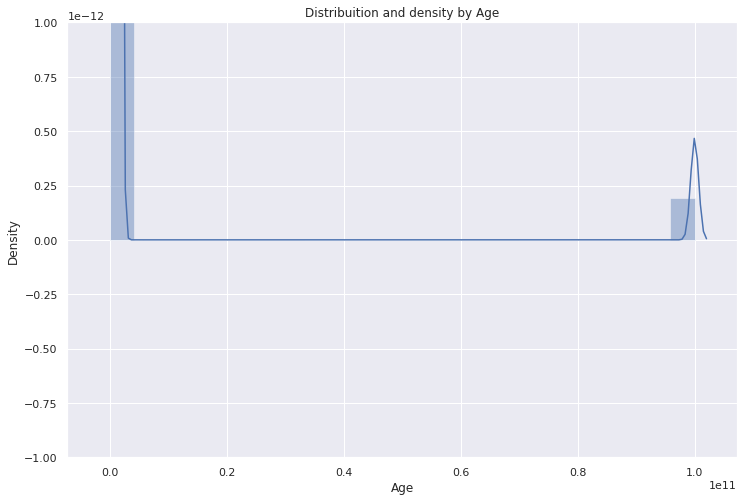

In [ ]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'remote_work')

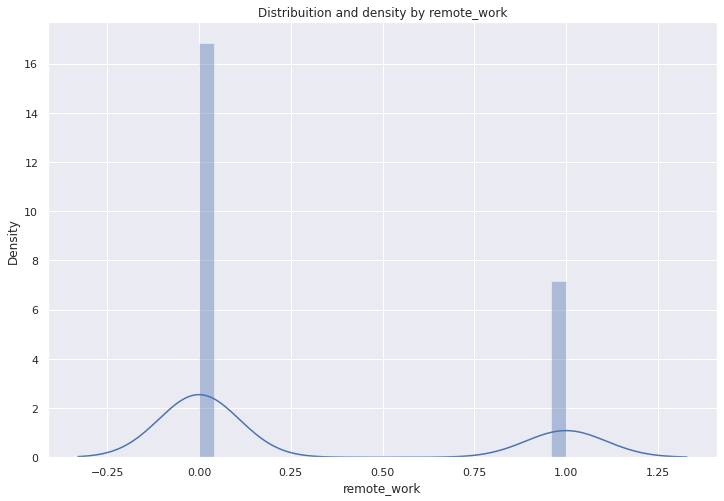

In [ ]:
# Distribiution and density by remote_work
plt.figure(figsize=(12,8))
sns.distplot(data["remote_work"], bins=24)
plt.title("Distribuition and density by remote_work")
plt.xlabel("remote_work")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Year')

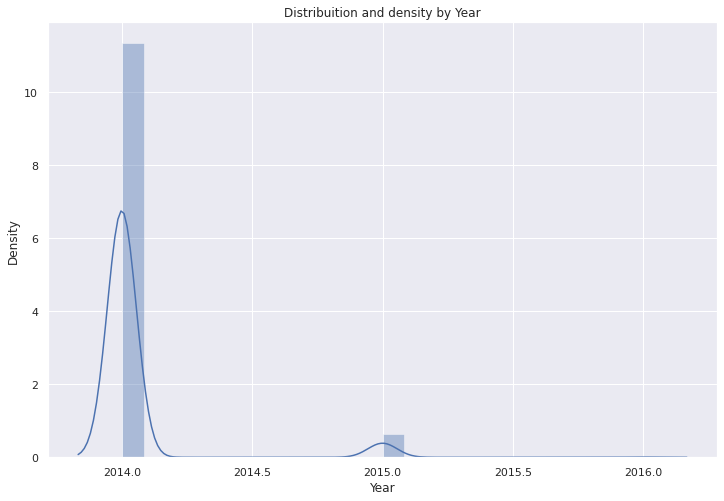

In [ ]:
# Distribiution and density by Year
plt.figure(figsize=(12,8))
sns.distplot(data["Year"], bins=24)
plt.title("Distribuition and density by Year")
plt.xlabel("Year")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'tech_company')

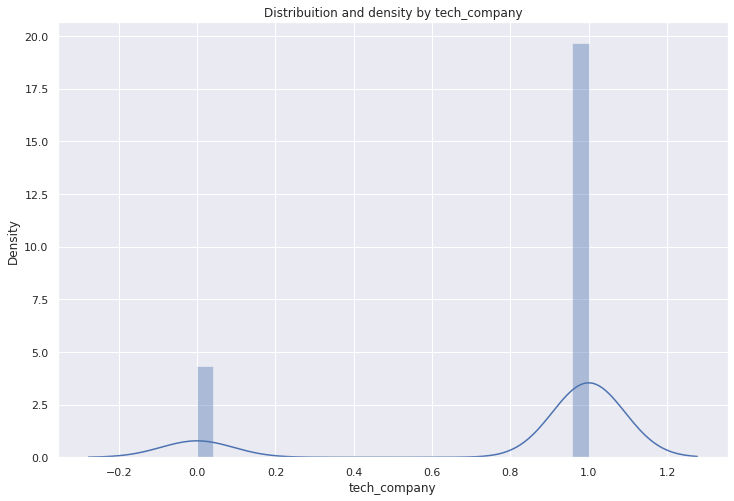

In [ ]:
# Distribiution and density by tech_company
plt.figure(figsize=(12,8))
sns.distplot(data["tech_company"], bins=24)
plt.title("Distribuition and density by tech_company")
plt.xlabel("tech_company")

In [ ]:
correlation = data.corr()

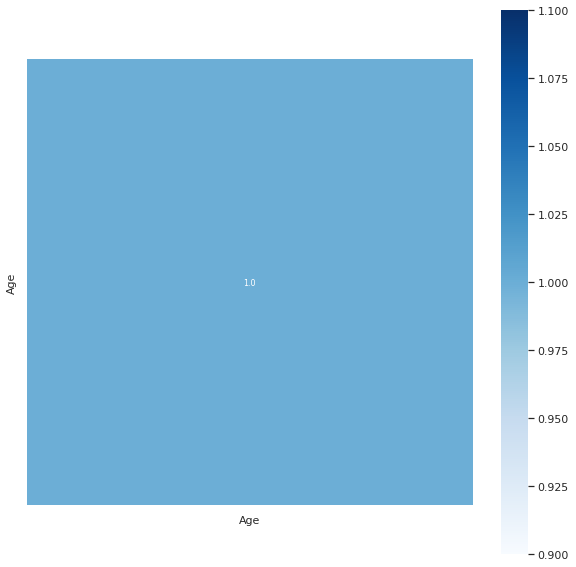

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Removing Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


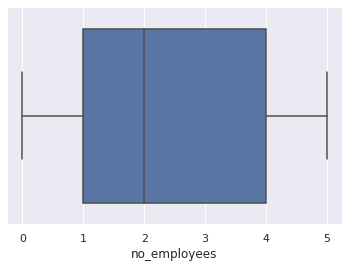

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['no_employees'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


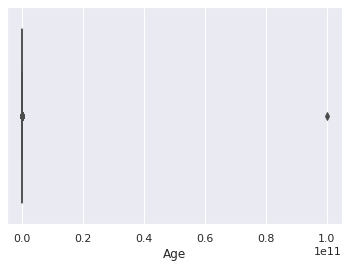

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['Age'])

With refrence to the above graph we can say that it does not contain any outliers


Feature Engeneering

The Timestamp column has date - uear month date and time in hrs minute and seconds. So we are going to seperate that out


In [ ]:
data['Timestamp']

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [ ]:
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

data = data.drop('Timestamp', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [ ]:
data


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,mi_Yes,pi_Don't know,pi_No,pi_Yes,Year,Month,Day,Hour,Minute,Second
0,37,0,0,0,Yes,3,1,0,1,0,...,0,0,0,1,2014,8,27,11,29,31
1,44,1,0,0,No,1,5,0,0,0,...,0,1,0,0,2014,8,27,11,29,37
2,32,1,0,0,No,1,1,0,1,0,...,1,0,1,0,2014,8,27,11,29,44
3,31,1,0,1,Yes,3,2,0,1,1,...,0,0,1,0,2014,8,27,11,29,46
4,31,1,0,0,No,0,3,1,1,0,...,1,1,0,0,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,...,0,1,0,0,2015,9,12,11,17,21
1255,32,1,0,1,Yes,3,2,1,1,0,...,0,0,0,1,2015,9,26,1,7,35
1256,34,1,0,1,Yes,2,5,0,1,0,...,0,0,1,0,2015,11,7,12,36,58
1257,46,0,0,0,No,2,3,1,1,0,...,0,0,1,0,2015,11,30,21,25,6


Encoding Features

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
#will display the variables present in each of the columns
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

In [ ]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Timestamp': ['2014-08-27 11:29:31',
  '2014-08-27 11:29:37',
  '2014-08-27 11:29:44',
  '2014-08-27 11:29:46',
  '2014-08-27 11:30:22',
  '2014-08-27 11:31:22',
  '2014-08-27 11:31:50',
  '2014-08-27 11:32:05',
  '2014-08-27 11:32:39',
  '2014-08-27 11:32:43',
  '2014-08-27 11:32:44',
  '2014-08-27 11:32:49',
  '2014-08-27 11:33:23',
  '2014-08-27 11:33:26',
  '2014-08-27 11:33:57',
  '2014-08-27 11:34:00',
  '2014-08-27 11:34:20',
  '2014-08-27 11:34:37',
  '2014-08-27 11:34:53',
  '2014-08-27 11:35:08',
  '2014-08-27 11:35:12',
  '2014-08-27 11:35:24',
  '2014-08-27 11:35:48',
  '2014-08-27 11:36:24',
  '2014-08-27 11:36:48',
  '2014-08-27 11:37:08',
  '2014-08-27 11:37:23',
  '2014-08-27 11:37:59',
  '2014-08-27 11:38:12',
  '2014-08-27 11:38:18',
  '2014-08-27 11:39:03',
  '2014-08-27 11:38:55',
  '2014-08-27 11:39:31',
  '2014-08-27 11:39:36',
  '2014-08-27 11:40:51',
  '2014-08-27 11:41:17',
  '2014-08-27 11:41:37',
  '2014-08-27 11:41:50',
  '2014-08-27 11:42:08',
  '2014-08-2

In [ ]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]

nominal_features = [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [ ]:
#writting a function to rename the females with 0 and males with 1
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

data['Gender'] = data['Gender'].apply(encode_gender)

In [ ]:
#Renaming the binary, encoded and onehot columns to numeric values
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df





In [ ]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
  ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [ ]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [ ]:
data


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,mi_Yes,pi_Don't know,pi_No,pi_Yes,Year,Month,Day,Hour,Minute,Second
0,37,0,0,0,Yes,3,1,0,1,0,...,0,0,0,1,2014,8,27,11,29,31
1,44,1,0,0,No,1,5,0,0,0,...,0,1,0,0,2014,8,27,11,29,37
2,32,1,0,0,No,1,1,0,1,0,...,1,0,1,0,2014,8,27,11,29,44
3,31,1,0,1,Yes,3,2,0,1,1,...,0,0,1,0,2014,8,27,11,29,46
4,31,1,0,0,No,0,3,1,1,0,...,1,1,0,0,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,...,0,1,0,0,2015,9,12,11,17,21
1255,32,1,0,1,Yes,3,2,1,1,0,...,0,0,0,1,2015,9,26,1,7,35
1256,34,1,0,1,Yes,2,5,0,1,0,...,0,0,1,0,2015,11,7,12,36,58
1257,46,0,0,0,No,2,3,1,1,0,...,0,0,1,0,2015,11,30,21,25,6


Tuning the model

Tuning with Randomized search CV

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [ ]:
data.shape

(1259, 26)

Model training

Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:

X = data.drop(columns=['treatment'], axis=1)
y = data['treatment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)


y_train = np.array(y_train)
y_train = y_train.reshape(-1)


y_test = np.array(y_test)
y_test= y_test.reshape(-1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score as acs

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictionLR = lr.predict(X_test)
cmlr = confusion_matrix(y_test, predictionLR)
crlr = classification_report(y_test, predictionLR)
aslr = acs(y_test, predictionLR)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lr = LogisticRegression()


In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, lr.predict(X_test)))

Accuracy: 0.6944444444444444


K Nearest Neighbor

In [ ]:

from sklearn.neighbors import KNeighborsClassifier 

kn = KNeighborsClassifier(n_neighbors = 5,metric='minkowski', p =2)
kn.fit(X_train,y_train)
predictionKN = kn.predict(X_test)
cmkn = confusion_matrix(y_test, predictionKN)
crkn = classification_report(y_test, predictionKN)
askn = acs(y_test, predictionKN)

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, kn.predict(X_test)))

Accuracy: 0.5119047619047619


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators= 50,max_depth=15)
rfc.fit(X_train,y_train)
predictionRFC = rfc.predict(X_test)
cmrfc = confusion_matrix(y_test, predictionRFC)
crrfc = classification_report(y_test, predictionRFC)
asrfc = acs(y_test, predictionRFC)

from sklearn.model_selection import cross_val_score


scoreRFC = cross_val_score(rfc,X,y,cv = 10)
k=0
for i in range(0,10):
    k=scoreRFC[i]+k
k=k/10

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, rfc.predict(X_test)))

Accuracy: 0.7261904761904762


Creating a predictive Model

In [ ]:
#Bagging
from sklearn.ensemble import  AdaBoostClassifier
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,5,Yes
1,494,No
2,52,No
3,986,Yes
4,186,No
